# Lalonde NSW Data

A. Load the Lalonde experimental dataset with the `lalonde_data` method from the module `causalinference.utils`. Using `CausalModel` from the module `causalinference`, provide summary statistics for the outcome variable and the covariates. Which covariate has the largest normalized difference? 

In [1]:
from causalinference.utils import lalonde_data
from causalinference import CausalModel

In [2]:
Y,D,X = lalonde_data()
model = CausalModel(Y,D,X)
print(model.summary_stats)


Summary Statistics

                       Controls (N_c=260)         Treated (N_t=185)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        4.555        5.484        6.349        7.867        1.794

                       Controls (N_c=260)         Treated (N_t=185)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        0.827        0.379        0.843        0.365        0.044
             X1        0.108        0.311        0.059        0.237       -0.175
             X2       25.054        7.058       25.816        7.155        0.107
             X3        0.154        0.361        0.189        0.393        0.094
             X4        0.835        0.372        0.708        0.456       -0.304
      

The covariate `Nodegree` has the largest normalized difference. 

---

B. Estimate the propensity score using the selection algorithm `est_propensity_s`. In selecting the basic covariates set, specify `E74`, `U74`, `E75`, and `U75`. What are the additional linear terms and second-order terms that were selected by the algorithm?

In [3]:
model.est_propensity_s(lin_B=[6,7,8,9])
print(model.propensity)


Estimated Parameters of Propensity Score

                    Coef.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
     Intercept     -3.480      4.471     -0.778      0.436    -12.243      5.283
            X6      0.034      0.051      0.667      0.505     -0.066      0.133
            X7     -0.236      0.386     -0.611      0.541     -0.992      0.521
            X8      0.058      0.051      1.144      0.253     -0.041      0.158
            X9     -3.477      1.652     -2.104      0.035     -6.716     -0.238
            X4      7.329      4.255      1.723      0.085     -1.010     15.668
            X1     -0.653      0.385     -1.696      0.090     -1.409      0.102
            X5      0.290      0.370      0.783      0.433     -0.435      1.015
         X4*X5     -0.668      0.349     -1.915      0.056     -1.352      0.016
         X6*X4     -0.130      0.057     -2.286      0.022     -0.

The algorithm also selected `Nodegree`, `Hispanic`, `Education`, `Nodegree x Education`, `E74 x Nodegree` and `U75 x Education` for estimating the propensity score. 

---

C. Trim the sample using `trim_s` to get rid of observations with extreme propensity score values. What is the cut-off that is selected? How many observations are dropped as a result? 

In [4]:
model.trim_s()
print(model.cutoff)
print(model.summary_stats)

0.131042280162

Summary Statistics

                       Controls (N_c=256)         Treated (N_t=182)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        4.543        5.501        6.237        7.587        1.694

                       Controls (N_c=256)         Treated (N_t=182)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        0.828        0.378        0.841        0.367        0.034
             X1        0.109        0.313        0.060        0.239       -0.176
             X2       25.074        7.091       25.841        7.208        0.107
             X3        0.156        0.364        0.187        0.391        0.081
             X4        0.832        0.375        0.714        0.453     

The cut-off selected is `0.131`. 7 observations are dropped: 4 from the control group and 3 from the treated group.  

---

D. Stratify the sample using `stratify_s`. How many propensity bins are created? Report the summary statistics for each bin. 

In [5]:
model.stratify_s()
print(model.strata)
for stratum in model.strata:
    print(stratum.summary_stats)


Stratification Summary

              Propensity Score         Sample Size     Ave. Propensity   Outcome
   Stratum      Min.      Max.  Controls   Treated  Controls   Treated  Raw-diff
--------------------------------------------------------------------------------
         1     0.131     0.379       153        67     0.327     0.332     0.788
         2     0.380     0.483        69        63     0.435     0.443     1.587
         3     0.487     0.852        34        52     0.596     0.619     3.044


Summary Statistics

                       Controls (N_c=153)          Treated (N_t=67)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        4.519        5.821        5.308        6.226        0.788

                       Controls (N_c=153)          Treated (N_t=67)             
       Variable         Mean         S.d.         Mean       

---

E. Estimate the average treatment effect using OLS, blocking, and matching. For matching, set the number of matches to 2 and adjust for bias. How much do the estimates differ? 

In [6]:
model.est_via_ols()
model.est_via_matching(matches=2, bias_adj=True)
model.est_via_blocking()
print(model.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      1.467      0.638      2.299      0.022      0.216      2.718
           ATC      1.385      0.652      2.123      0.034      0.106      2.663
           ATT      1.583      0.651      2.432      0.015      0.307      2.858

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      1.400      0.888      1.576      0.115     -0.341      3.140
           ATC      1.316      0.971      1.356      0.175     -0.587      3.219
           ATT      1.517      0.935      1.623      0.105     -0.315      3.350

Treatment Effect Estimates: Blocking

                     Est.       S.e.          z      P>|z|      [95% Conf. int

The estimates of average treatment effects (ATE) from the three methods are roughly the same . 

---

# Document Classification

A. From the module `sklearn.datasets`, load the training data set using the method `fetch_20newsgroups`. This dataset comprises around 18000 newsgroups posts on 20 topics. Print out a couple sample posts and list out all the topic names.

In [7]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

In [8]:
data_train = fetch_20newsgroups(subset='train')
data_test = fetch_20newsgroups(subset='test')
Y_train = data_train.target
X_train = data_train.data
X_test = data_test.data
Y_test = data_test.target
print(data_train.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [9]:
for i in range(5):
    print(X_train[i])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.wa

---

B. Convert the posts (blobs of texts) into bag-of-word vectors. What is the dimensionality of these vectors? That is, what is the number of words that have appeared in this data set? 

In [10]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
print(X_train.shape)

(11314, 130107)


The bag-of-word vectors have a dimension of `130107` for the training set. However, some of these "words" are just meaningless strings. 

---

C. Use your favorite dimensionality reduction technique to compress these vectors into ones of $K=30$ dimensions. 

D. Use your favorite supervised learning model to train a model that tries to predict the topic of a post from the vectorized representation of the post you obtained in the previous step.

E. Use the test data to tune your model. Make sure to include $K$ as a hyperparameter as well. Use `accuracy_score` from `sklearn.metrics` as your evaluation metric. What is the highest accuracy you are able to achieve? 

In [11]:
scores=np.zeros(50)
clf = MultinomialNB(alpha=.01)
for k in range(50):
    nmf = NMF(n_components=k+1).fit(X_train)
    X_train_nmf = nmf.transform(X_train)
    X_test_nmf = nmf.transform(X_test)
    clf.fit(X_train_nmf, Y_train)
    Y_pred = clf.predict(X_test_nmf)
    scores[k] = accuracy_score(Y_test,Y_pred)

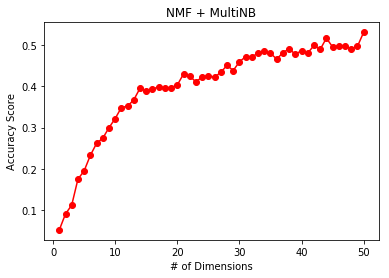

In [12]:
plt.title('NMF + MultiNB')
plt.plot(np.array(range(50))+1, scores, 'ro-')
plt.xlabel('# of Dimensions')
plt.ylabel('Accuracy Score')
plt.show()

In [13]:
print(np.argmax(scores)+1,max(scores))

50 0.530005310674


In [15]:
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

0.835236325013


I used Non-negative Matrix Factorization for dimension reduction and Multinomial Naive Bayes for classifier. It turns out that the dimension reduction is not helping the classifier: with up to $K=50$ dimensions, the accuracy score is `0.530`, while using the raw TFIDF vectors the accuracy score is `0.835`. 

---